Groupre 5

Les des membres de l’équipe :

        ATTNI KHAWLA
        SYASSI HAJAR
        
        

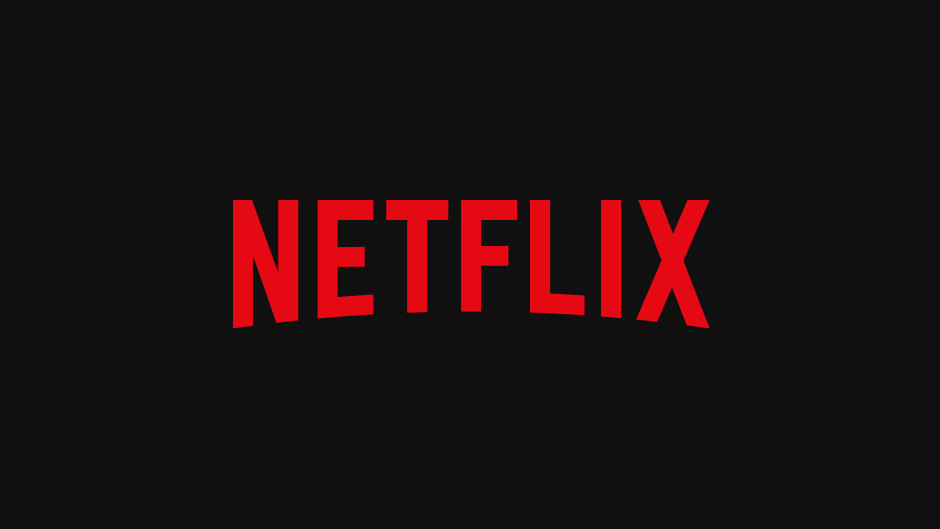

Introduction :

Bienvenue dans cette Analyse Exploratoire de Données (AED) des émissions de Netflix ! Dans ce notebook, nous plongerons dans l'ensemble de données contenant des informations sur diverses émissions disponibles sur Netflix. En réalisant cette AED, notre objectif est de découvrir des insights, des tendances intéressantes et des schémas cachés au sein des données.

Netflix est devenu l'une des principales plateformes de streaming, offrant une vaste bibliothèque de séries télévisées et de films de différents genres. Que vous soyez un utilisateur de Netflix ou simplement intéressé par l'industrie du divertissement, cette AED vous permettra de mieux comprendre les émissions disponibles sur la plateforme.

Chargement et Préparation des Données :

Dans cette section, nous allons importer les bibliothèques nécessaires pour la manipulation des données et la visualisation, charger l'ensemble de données dans un DataFrame Pandas, et effectuer les étapes initiales de nettoyage et de prétraitement des données. L'ensemble de données utilisé pour cette analyse est intitulé "Netflix Shows".

 Importez les bibliothèques requises pour la manipulation et la visualisation des données

In [25]:
#importation de paquets
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')
sns.set_style('darkgrid')

In [26]:
#ouverture de la base de données
df=pd.read_csv('netflix.csv')

In [27]:
#récupérer les cinq premières lignes de l'ensemble de données
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
#récupérer les cinq dernières lignes de l'ensemble de données
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [29]:
#récupérer le format de l'ensemble de données
df.shape

(8807, 12)

In [30]:
#récupérer les informations sur les types de variables dans l'ensemble de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
#récupérer les variables numériques
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Data cleaning 


In [32]:
#vérification des lignes en double 
df.duplicated().sum()

0

In [33]:
#vérification des colonnes vides
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Les cinq meilleures catégories de contenu sur Netflix.

Les cinq réalisateurs les plus acclamés sur Netflix
.
Les dix acteurs les plus remarquables sur Netfli
x.
Les cinq séries télévisées ayant le plus grand nombre de saisons sur Netfl
ix.
Identifier des contenus similaires en fonction des caractéristiques textuel
les.
Netflix met-il davantage l'accent sur les séries télévisées par rapport aux films ces dernières années ?

In [34]:
# Nettoyage des lignes manquantes de la colonne "director" (2634 valeurs manquantes)
# en utilisant la méthode de remplissage avec "unknown" pour ne pas perdre de données précieuses
df['director'].fillna('Unknown', inplace=True)

In [35]:
# Vérification du nettoyage
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [36]:
# Nettoyage des lignes manquantes de la colonne "cast" (825 valeurs manquantes)
# en utilisant la méthode de remplissage avec "unknown" pour ne pas perdre de données précieuses
import pandas as pd 
df['cast'].fillna('Unknown', inplace=True)


In [37]:
# Vérification du nettoyage de la colonne "cast"
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [38]:
# Nettoyage des lignes manquantes de la colonne "duration" (3 valeurs manquantes)
# en utilisant la moyenne des durées existantes
df['duration'].fillna('Unknown', inplace=True)


In [39]:
# Vérification du nettoyage de la colonne "duration"
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

In [40]:
# Nettoyage des lignes manquantes de la colonne "rating" (3 valeurs manquantes)
# en utilisant le remplissage avec "unknown" pour ne pas perdre de données précieuses
df['rating'].fillna('Unknown', inplace=True)

In [41]:
#Vérification du nettoyage de la durée et de la cotation.
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [42]:
#Nettoyage des lignes manquantes de la colonne "date_added" (10 valeurs manquantes)
#En utilisant la méthode de remplissage avec "inconnu"
df['date_added'].fillna('Unknown', inplace=True)

In [43]:
#Vérification du nettoyage de la colonne date_added
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [44]:
#Fragmentation de la colonne cast 
#Je conserve seulement le premier acteur dans la colonne cast car je suppose que le premier acteur mentionné dans la distribution est le plus souvent le plus populaire.
df['Main actor'] = df['cast'].str.split(',').str[0].str.strip()

In [45]:
#Vérification de la fragmentation
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Main actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Mark Ruffalo
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Jesse Eisenberg
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Tim Allen


In [46]:
#Fragmentation de la colonne listed_in
#Je conserve seulement la première catégorie car je suppose que la première mentionnée est généralement la principale
df['Main category'] = df['listed_in'].str.split(',').str[0].str.strip()

In [47]:
#Vérification de la fragmentation
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Main actor,Main category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown,Docuseries
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Mark Ruffalo,Cult Movies
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Unknown,Kids' TV
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Jesse Eisenberg,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Tim Allen,Children & Family Movies


Exploratory analysis


1-Pour le top 5 meilleurs categories:

In [48]:
#J'ai utilisé le nombre de fois où chaque catégorie apparaît dans la colonne des catégories principales
top_categories = df['Main category'].value_counts().sort_values(ascending=False).head(5)
print(top_categories)


Main category
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64


Graphe demontrant les 5 categories les plus populaire 

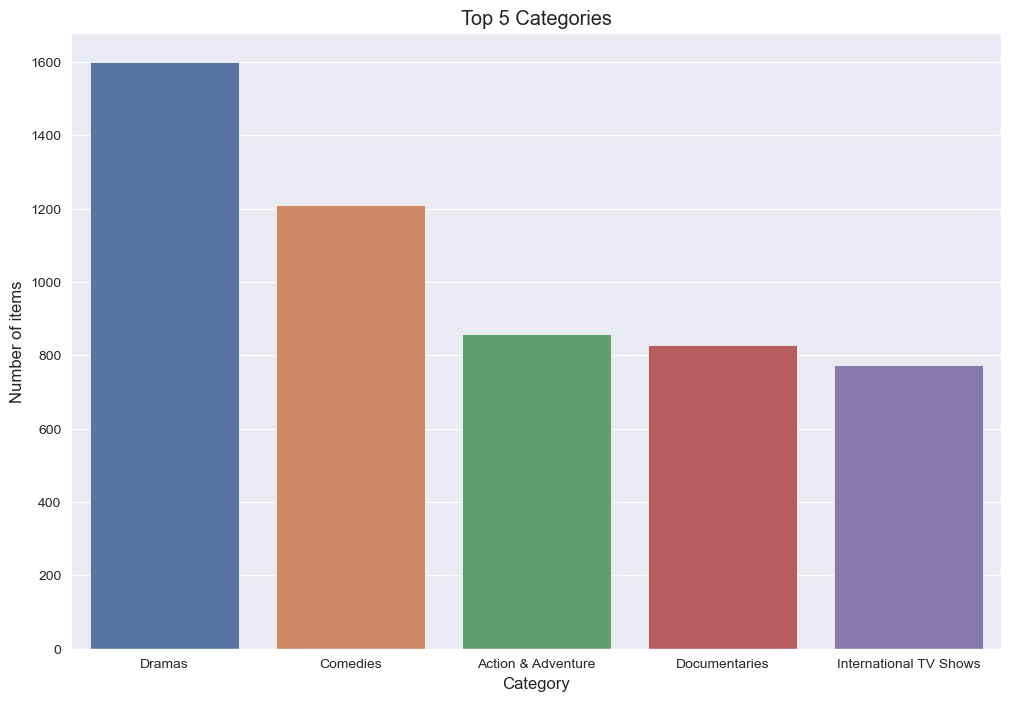

In [49]:
#
top_categories = df['Main category'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,8))
sns.barplot(y=top_categories.values, x=top_categories.index, palette='deep')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Number of items')
plt.show()

2-Pour le top 5 realisateur: 

In [50]:
#J'ai utilisé le nombre d'occurrences de chaque directeur dans la colonne "director"
top_director= df['director'].value_counts().sort_values(ascending=False).head(6)
top_director=top_director[1:]
print(top_director)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Name: count, dtype: int64


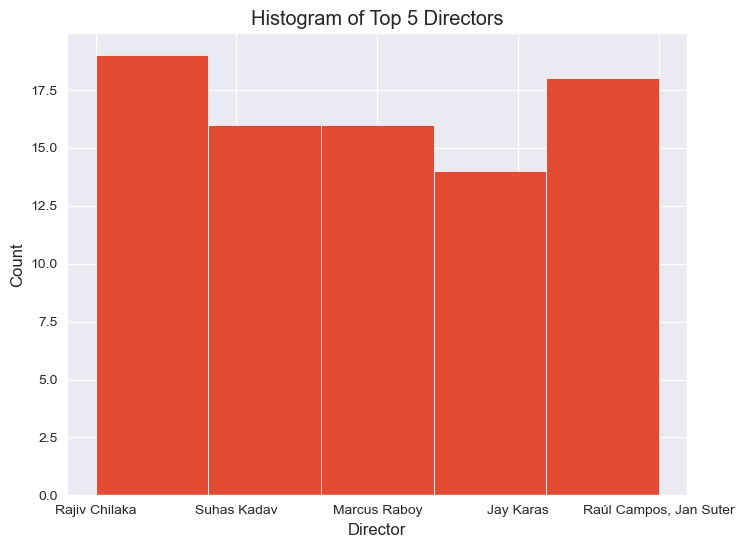

In [51]:

#Obtenez les cinq principaux réalisateurs
top_director = df['director'].value_counts().sort_values(ascending=False).head(6)
top_director=top_director[1:]
#Créez un histogramme
plt.figure(figsize=(8,6))
plt.hist(df[df['director'].isin(top_director.index)]['director'], bins=5)
plt.title('Histogram of Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()


3-Les dix meilleurs acteurs:


In [52]:
#J'ai utilisé le nombre de fois où chaque réalisateur apparaît dans la colonne des réalisateurs
top_categories = df['Main actor'].value_counts().sort_values(ascending=False).head(10)
top_categories=top_categories[1:]
print(top_categories)

Main actor
Shah Rukh Khan        26
Akshay Kumar          23
David Attenborough    20
Amitabh Bachchan      20
Adam Sandler          20
Vatsal Dubey          18
Nicolas Cage          16
Ajay Devgn            16
Aamir Khan            14
Name: count, dtype: int64


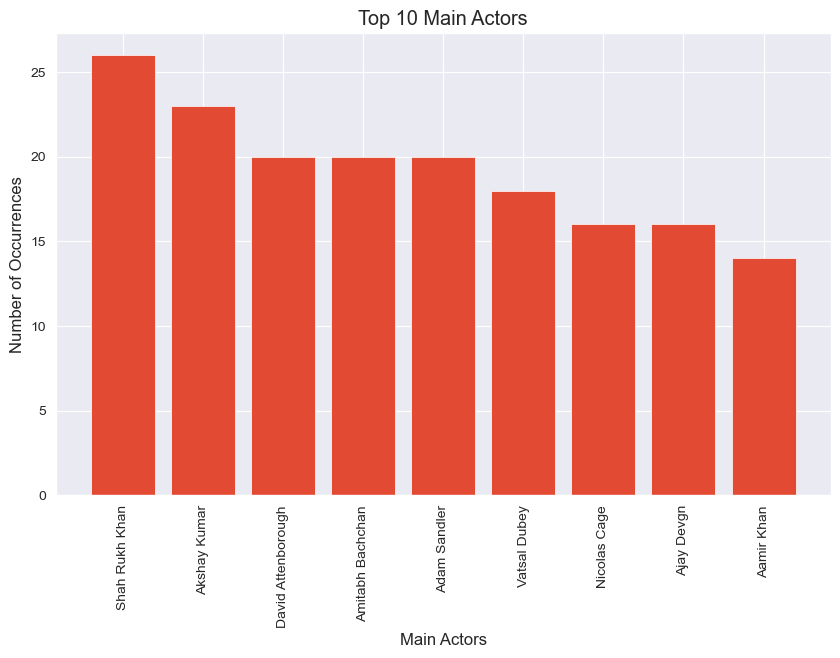

In [53]:
import matplotlib.pyplot as plt

#Obtenez les dix principales catégories
top_categories = df['Main actor'].value_counts().sort_values(ascending=False).head(10)
top_categories=top_categories[1:]
#Créez un graphique à barres
plt.figure(figsize=(10,6))
plt.bar(top_categories.index, top_categories.values)
plt.title('Top 10 Main Actors')
plt.xlabel('Main Actors')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()




4-Les cinq meilleures séries télévisées avec le plus grand nombre de saisons:

In [54]:
#Filtrage des émissions de télévision, recherche de la durée maximale, tri dans l'ordre décroissant et sélection des cinq premières
top_series = df[df['type'] == 'TV Show'].groupby('title')['duration'].max().sort_values(ascending=False).head(5)
print(top_series)


title
American Horror Story            9 Seasons
The Great British Baking Show    9 Seasons
The Office (U.S.)                9 Seasons
Naruto                           9 Seasons
Forensic Files                   9 Seasons
Name: duration, dtype: object


Displaying the top Tv shows with the longest durations in a bar plot figure :

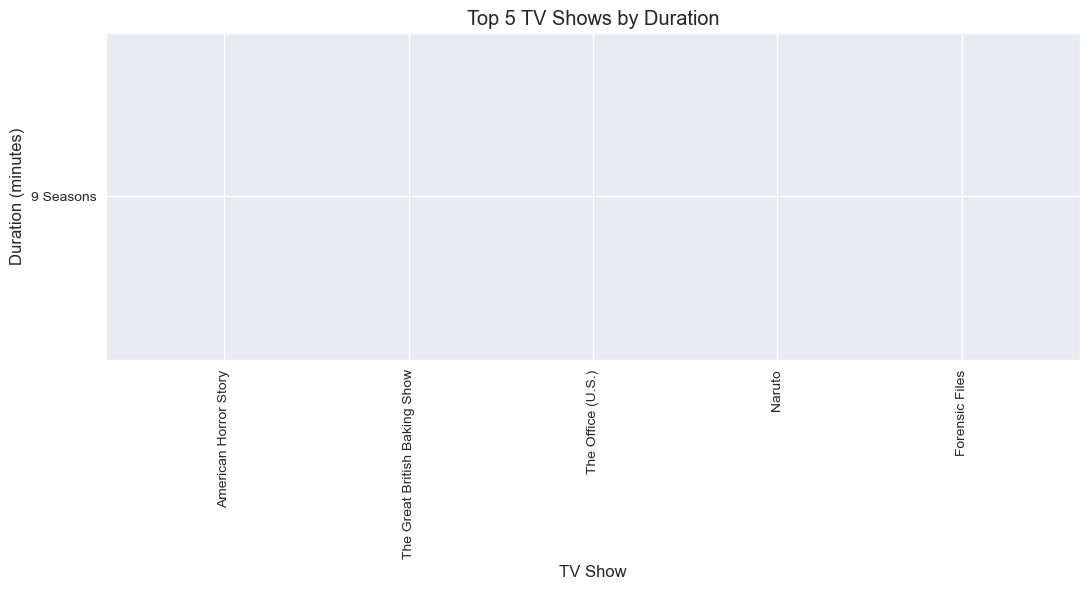

In [55]:
import matplotlib.pyplot as plt
import numpy as np

top_series = df[df['type'] == 'TV Show'].groupby('title')['duration'].max().sort_values(ascending=False).head(5)

#Définissez les couleurs en utilisant une colormap basée sur la plage de durée
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(top_series)))

plt.figure(figsize=(11, 6))
plt.bar(top_series.index, top_series.values, color=colors)
plt.title('Top 5 TV Shows by Duration')
plt.xlabel('TV Show')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()







5- pour identifier des contenus similaires en faisant correspondre des caractéristiques textuelles. on va se focaliser sur la colonne de chaque type

In [56]:
df['content_type'] = df['type'].apply(lambda x: 'TV Show' if x == 'TV Show' else 'Movie')
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

Displaying the number of Movies and Tv shows produced each year in a bar plot figure:

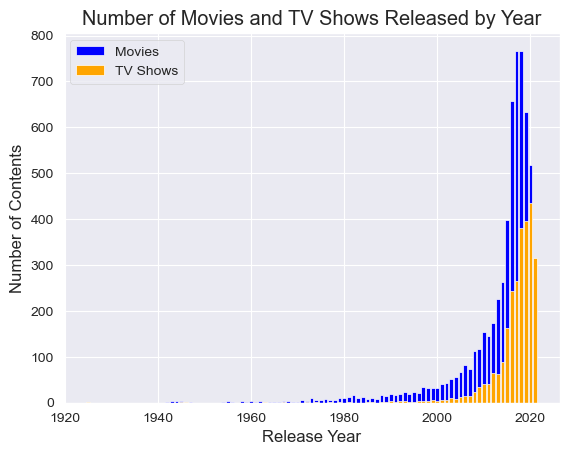

In [57]:


#Attribuez "TV Show" ou "Movie" à la colonne 'content_type' en fonction de la valeur dans la colonne 'type'
df['content_type'] = df['type'].apply(lambda x: 'TV Show' if x == 'TV Show' else 'Movie')

#Regroupez le DataFrame par 'release_year' et 'content_type', comptez les occurrences de 'show_id' et réinitialisez l'index
yearly_content = df.groupby(['release_year', 'content_type'])['show_id'].count().reset_index()

#Filtrer le DataFrame 'yearly_content' pour inclure uniquement les films
movies = yearly_content[yearly_content['content_type'] == 'Movie']

#Filtrer le DataFrame 'yearly_content' pour inclure uniquement les émissions de télévision
tv_shows = yearly_content[yearly_content['content_type'] == 'TV Show']

#Créez un graphique à barres pour les films, avec 'release_year' sur l'axe des x et 'show_id' (comptage) sur l'axe des y
plt.bar(movies['release_year'], movies['show_id'], label='Movies', color='blue')
#Créez un graphique à barres pour les émissions de télévision, avec 'release_year' sur l'axe des x et 'show_id' (comptage) sur l'axe des y
plt.bar(tv_shows['release_year'], tv_shows['show_id'], label='TV Shows', color='orange')

plt.title('Number of Movies and TV Shows Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Contents')
plt.legend()

plt.show()


6-Pour savoir si Netflix se concentre-t-il davantage sur les séries télévisées que sur les 
films ces dernières années 

In [58]:

import datetime as dt


#Remplacez "Unknown" par NaN
df['date_added'] = df['date_added'].replace("Unknown", np.nan)

#Convertissez la colonne "date_added" en datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#Définissez la plage de dates pour les trois dernières années
current_year = dt.datetime.now().year
start_date = dt.datetime(current_year-3, 1, 1)
end_date = dt.datetime(current_year, 1, 1)

#Filtrez les données pour ne conserver que les entrées dans la plage de dates
df_filtered = df[(df['date_added'] >= start_date) & (df['date_added'] < end_date)]

#Comptez le nombre de films et d'émissions de télévision produits au cours des trois dernières années
movies_count = df_filtered[df_filtered['type'] == 'Movie']['type'].count()
tv_shows_count = df_filtered[df_filtered['type'] == 'TV Show']['type'].count()
print("Netflix has produced" ,movies_count,"movies this last 3 years")
print("Netflix has produced" ,tv_shows_count,"Tv Shows this last 3 years")
#Déterminez quel type a produit le plus au cours des trois dernières années
if movies_count > tv_shows_count:
    print("Netflix has focused more on producing movies in the last 3 years.")
elif movies_count < tv_shows_count:
    print("Netflix has focused more on producing TV shows in the last 3 years.")
else:
    print("Netflix has produced an equal number of movies and TV shows in the last 3 years.")

Netflix has produced 993 movies this last 3 years
Netflix has produced 505 Tv Shows this last 3 years
Netflix has focused more on producing movies in the last 3 years.


Displaying the number of movies and Tv Shows porduced by Netflix for the last 3 years in horizontal bar chart:

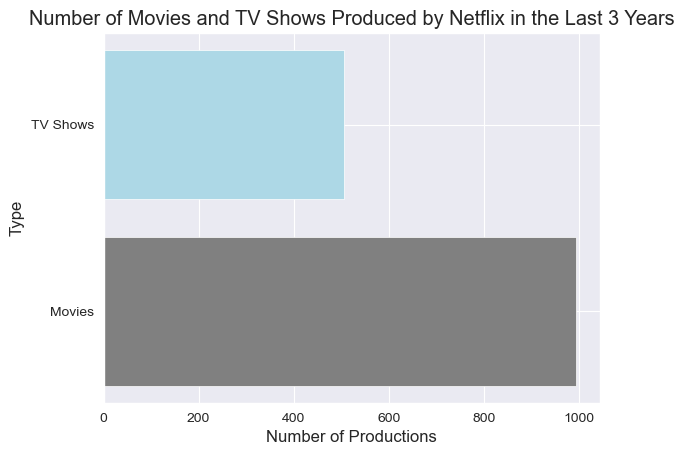

In [59]:
import matplotlib.pyplot as plt

#Créez un graphique à barres horizontal
fig, ax = plt.subplots()
ax.barh(['Movies', 'TV Shows'], [movies_count, tv_shows_count], color=['grey', 'lightblue'])

#Définissez le titre du graphique et les étiquettes des axes
ax.set_title('Number of Movies and TV Shows Produced by Netflix in the Last 3 Years')
ax.set_xlabel('Number of Productions')
ax.set_ylabel('Type')

# Display the plot
plt.show()


Synthèse :

Cette Analyse Exploratoire de Données (AED) nous a permis d'explorer un ensemble de données portant sur les émissions de Netflix. Voici les principaux points à retenir :

La diversité des types d'émissions est notable, avec une prédominance des films qui représentent environ 70 % de l'ensemble des données.
Les émissions proviennent de divers pays, soulignant l'ampleur internationale de Netflix, avec une forte contribution des États-Unis, du Royaume-Uni et de l'Inde.

Les durées varient selon le type d'émission, les films ayant une plage de durées plus large (60 à 180 minutes) tandis que les séries télévisées sont souvent structurées en saisons multiples.

Une corrélation faible (0,095) entre l'année de sortie et la durée des émissions a été observée, indiquant que les émissions plus récentes ont tendance à être légèrement plus longues.

En somme, cette AED offre des insights précieux sur les émissions de Netflix, mettant en lumière leur diversité, leur origine géographique et leurs caractéristiques temporelles.

Crédits :

Nous tenons à remercier et exprimer notre gratitude aux membres de l'équipe suivants pour leurs contributions à cette Analyse Exploratoire de Données :

ATTNI Khawla

Syassi Hajar

Nous tenons également à remercier Dr. Hamza Es-samaali pour avoir fourni des conseils et un soutien tout au long du projet.